Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Imagen cargada correctamente
Shape: (427, 638, 3)


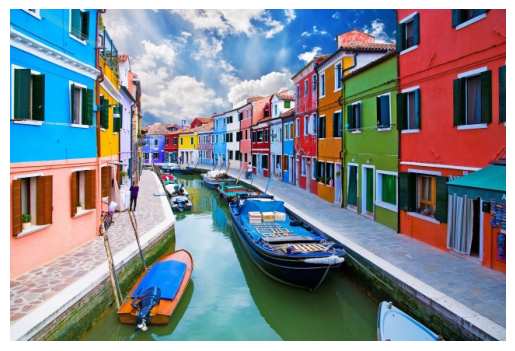

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

path = "/content/drive/MyDrive/TrabajosVision/IMAGEN A COLOR.jpg"

img = cv2.imread(path)

if img is None:
    print("No se pudo cargar la imagen")
else:
    print("Imagen cargada correctamente")
    print("Shape:", img.shape)

    # Mostrar imagen para confirmar
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")


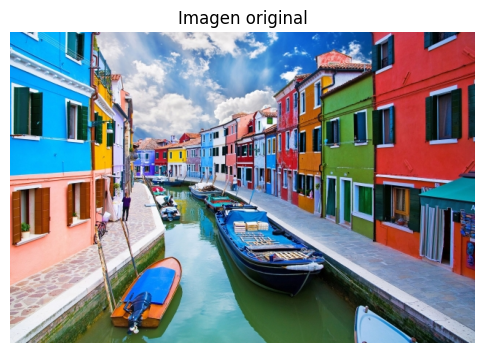

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Imagen original")
plt.show()


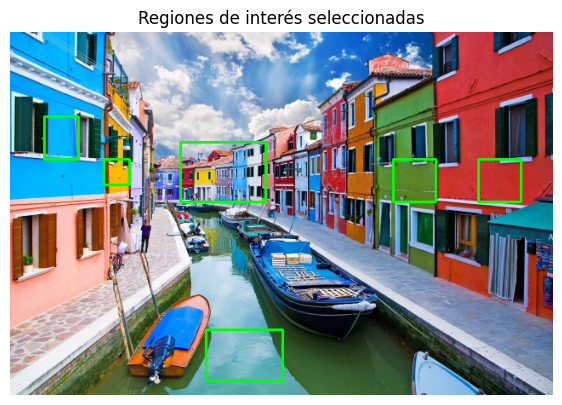

In [ ]:
from cv2.gapi.wip import draw

rois = {
    "Rojo": img[150:200, 550:600],
    "Verde": img[150:200, 450:500],
    "Azul": img[100:150, 40:80],
    "Amarillo": img[150:180, 110:140],
    "Verde_agua": img[350:410, 230:320],
    "No_homogeneo": img[130:200, 200:300]
}

img_rect = img.copy()

coords = [
    (600,150,550,200),   # Rojo
    (450,150,500,200),   # verde
    (40,100,80,150),     # azul
    (110,150,140,180),   # amarillo
    (230,350,320,410),   # verde agua
    (200,200,300,130),   # no homogeneo
]

for (x1,y1,x2,y2) in coords:
    cv2.rectangle(img_rect, (x1,y1), (x2,y2), (0,255,0), 2)


plt.figure(figsize=(7,5))
plt.imshow(cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Regiones de interés seleccionadas")
plt.show()


In [ ]:
print("MEDIA DE LOS CANALES (B, G, R)\n")

medias = {}

for nombre, roi in rois.items():
    mean = cv2.mean(roi)[:3]
    medias[nombre] = mean
    print(f"{nombre}: B={mean[0]:.2f}, G={mean[1]:.2f}, R={mean[2]:.2f}")


MEDIA DE LOS CANALES (B, G, R)

Rojo: B=51.35, G=52.61, R=193.02
Verde: B=50.57, G=128.18, R=89.10
Azul: B=220.72, G=158.99, R=15.55
Amarillo: B=28.58, G=147.04, R=191.50
Verde_agua: B=183.20, G=175.33, R=112.32
No_homogeneo: B=159.03, G=145.78, R=144.61


In [ ]:
print("\nDESVIACIÓN ESTÁNDAR (B, G, R)\n")

desviaciones = {}

for nombre, roi in rois.items():
    std = np.std(roi.reshape(-1,3), axis=0)
    desviaciones[nombre] = std
    print(f"{nombre}: B={std[0]:.2f}, G={std[1]:.2f}, R={std[2]:.2f}")



DESVIACIÓN ESTÁNDAR (B, G, R)

Rojo: B=37.26, G=26.21, R=15.72
Verde: B=30.93, G=21.05, R=17.86
Azul: B=66.34, G=46.05, R=32.31
Amarillo: B=48.91, G=56.86, R=80.90
Verde_agua: B=43.48, G=28.34, R=29.51
No_homogeneo: B=72.02, G=62.12, R=67.26
